#### Analyst: Dhruv Singh <br> Report Name: ML Model, Phase 2 <br> Report Quarter, Year: FY 2011-2021 <br> Date Updated: 09/10/2021

# Phase II: Pre-Processing

In [14]:
# libraries
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [3]:
# Read in data

df = pd.read_csv('cleaned_data/df.csv')
df.head()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,...,Month,Year,BTW,DCCC,DCIA,LEAP,LTA,Pre-App,WIOA,TEP
0,40,0.0,1,1,11.0,0,0,0,0,0,...,3,2018,0,0,0,0,0,0,0,1
1,40,0.0,1,1,11.0,0,0,0,0,0,...,3,2018,0,0,0,0,0,0,0,1
2,40,0.0,1,1,11.0,0,0,0,0,0,...,12,2018,0,0,0,0,0,0,0,1
3,40,0.0,1,1,11.0,0,0,0,0,0,...,11,2018,0,0,0,0,0,0,0,1
4,40,0.0,1,1,11.0,0,0,0,0,0,...,4,2018,0,0,0,0,0,0,0,1


In [4]:
# Check where we have missing values
df.isnull().sum()

Age_AtReg               0
Disability              0
Gender                  0
CitizenStatus           0
EducationLevel          0
Race_Hispanic           0
Race_NativeAmerican     0
Race_Asian              0
Race_AfricanAmerican    0
Race_PacificIslander    0
Race_White              0
Employed                0
Length                  0
Month                   0
Year                    0
BTW                     0
DCCC                    0
DCIA                    0
LEAP                    0
LTA                     0
Pre-App                 0
WIOA                    0
TEP                     0
dtype: int64

In [5]:
# outlier detection
def detect_outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [6]:
# Determine what the upperbound should be for continuous features
for feat in ['Age_AtReg', 'EducationLevel']:
    detect_outlier(feat)


Outlier caps for Age_AtReg:
  --95p: 56.0 / 2903 values exceed that
  --3sd: 73.2 / 34 values exceed that
  --99p: 63.0 / 567 values exceed that

Outlier caps for EducationLevel:
  --95p: 20.0 / 2023 values exceed that
  --3sd: 25.1 / 1369 values exceed that
  --99p: 21.0 / 0 values exceed that


In [7]:
# Cap features
df['Age_AtReg'].clip(upper=df['Age_AtReg'].quantile(.99), inplace=True)
df['EducationLevel'] = df['EducationLevel'].clip(upper=df['EducationLevel'].quantile(.99))

In [9]:
# Describe the dataframe again to make sure the capping was successful
df.describe()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,...,Month,Year,BTW,DCCC,DCIA,LEAP,LTA,Pre-App,WIOA,TEP
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,34.281917,0.041606,1.428135,1.036491,14.320232,0.016114,0.014102,0.003803,0.882786,0.001825,...,6.210691,2016.241777,0.009822,0.075625,0.105550,0.010453,0.019507,0.004314,0.382368,0.392361
std,12.863112,0.199689,0.496258,0.240285,3.576829,0.125915,0.117912,0.061548,0.321678,0.042676,...,3.390176,2.919751,0.098618,0.264399,0.307264,0.101704,0.138300,0.065540,0.485970,0.488281
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,0.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,6.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,0.000000,2.000000,1.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,9.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,63.000000,1.000000,2.000000,3.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


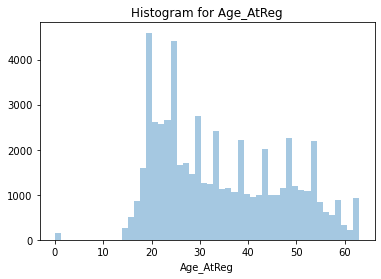

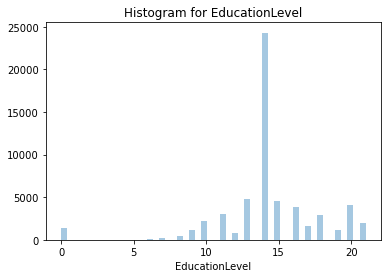

In [11]:
# Plot histogram for each continuous feature to see if a transformation is necessary
for feature in ['Age_AtReg', 'EducationLevel']:
    sns.distplot(df[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

### Box Cox Power Transformation

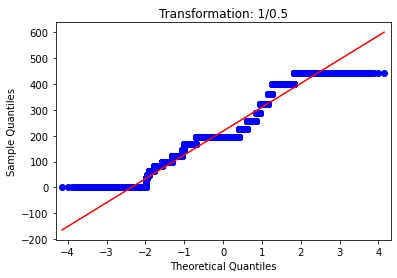

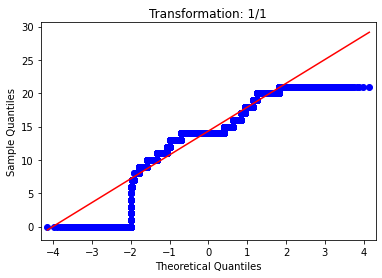

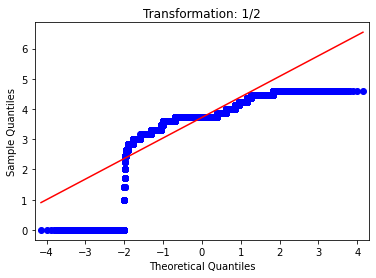

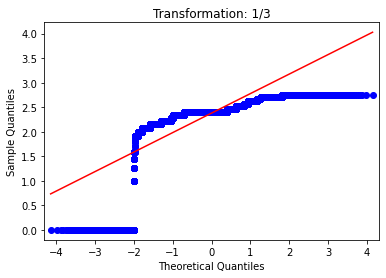

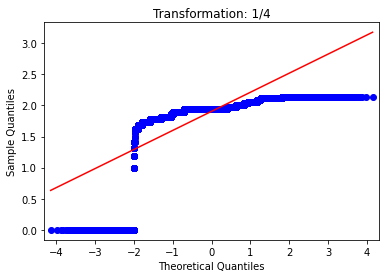

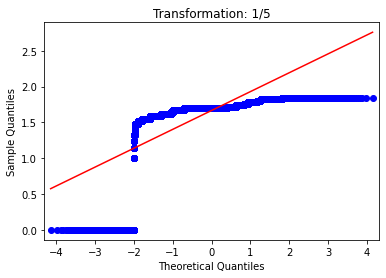

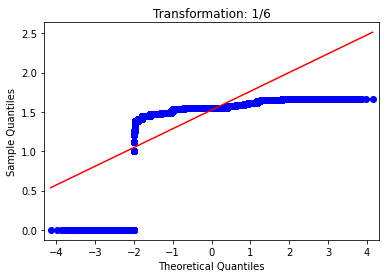

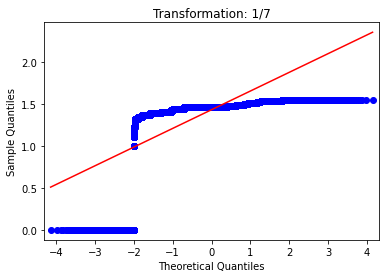

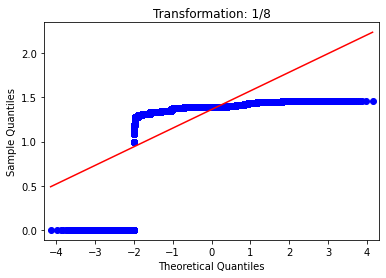

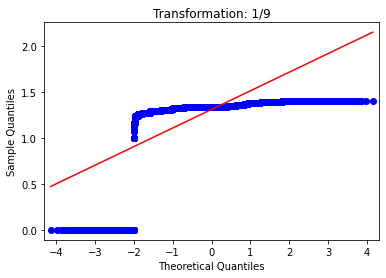

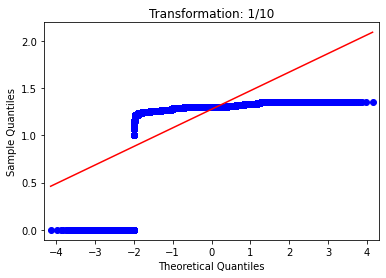

In [12]:
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = df['EducationLevel']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

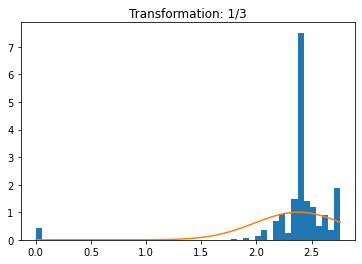

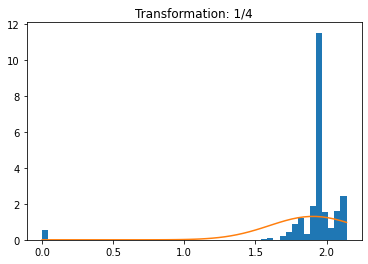

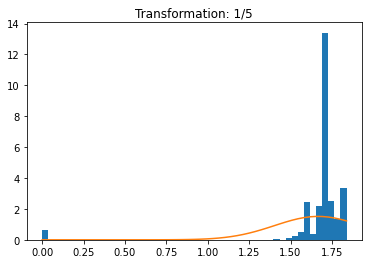

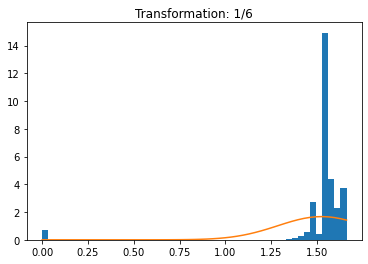

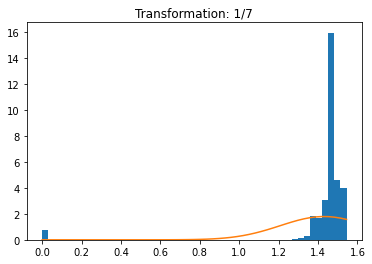

In [15]:
# Box-Cox transformation
for i in [3, 4, 5, 6, 7]:
    data_t = df['EducationLevel']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [16]:
# Create the new transformed feature
df['EducationLevel_tr'] = df['EducationLevel'].apply(lambda x: x**(1/3))
df.head()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,...,Year,BTW,DCCC,DCIA,LEAP,LTA,Pre-App,WIOA,TEP,EducationLevel_tr
0,40,0.0,1,1,11.0,0,0,0,0,0,...,2018,0,0,0,0,0,0,0,1,2.22398
1,40,0.0,1,1,11.0,0,0,0,0,0,...,2018,0,0,0,0,0,0,0,1,2.22398
2,40,0.0,1,1,11.0,0,0,0,0,0,...,2018,0,0,0,0,0,0,0,1,2.22398
3,40,0.0,1,1,11.0,0,0,0,0,0,...,2018,0,0,0,0,0,0,0,1,2.22398
4,40,0.0,1,1,11.0,0,0,0,0,0,...,2018,0,0,0,0,0,0,0,1,2.22398


In [17]:
df.to_csv('cleaned_data/df2.csv')